In [203]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./sample_data/",one_hot=True)

print("training examples {}".format(int(mnist.train.num_examples)))
print("testing exaples {}".format(int(mnist.test.num_examples)))

def plot_images(images,pred_cls,true_cls):
    fig, axes = plt.subplots(3,6)
    fig.subplots_adjust(hspace=0.5, wspace=2)
    for i, ax in enumerate(axes.flat):
        two_d = np.array(images[i], dtype='float')
        pixels = two_d.reshape((28, 28))
        xlabel = "true {0}, pred {1}".format(np.argmax(true_cls[i],axis=0), pred_cls[i])
        ax.set_xlabel(xlabel)
        ax.imshow(pixels,cmap='gray')      

Extracting ./sample_data/train-images-idx3-ubyte.gz
Extracting ./sample_data/train-labels-idx1-ubyte.gz
Extracting ./sample_data/t10k-images-idx3-ubyte.gz
Extracting ./sample_data/t10k-labels-idx1-ubyte.gz
training examples 55000
testing exaples 10000


In [0]:
#parameters
learning_rate = 0.01
epochs = 1024
batch_size = 256

In [0]:
#graph inputs
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])

#weights and biases
W = tf.Variable(tf.random_normal([784,10],mean=0.5,stddev=0.5))
b = tf.Variable(tf.zeros([10]))
               
#logistic model
pred = tf.nn.softmax(tf.matmul(X,W)+b) #softmax activation
pred_cls = tf.argmax(pred,1)
             
#cost function(cross entropy)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1))
                
#gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#model evaluation
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#variables initializer
init = tf.global_variables_initializer()
                
  

epoch=100 cost=0.4123067432474868
epoch=200 cost=0.34875807500331213
epoch=300 cost=0.326753810256998
epoch=400 cost=0.31845180530135864
epoch=500 cost=0.303045728496302
epoch=600 cost=0.2972912000857781
epoch=700 cost=0.28893127849447386
epoch=800 cost=0.2832177689420841
epoch=900 cost=0.27970689173056723
epoch=1000 cost=0.27636067659776903
Accuracy={} 92.00000166893005
Incorrect Predictions samples 



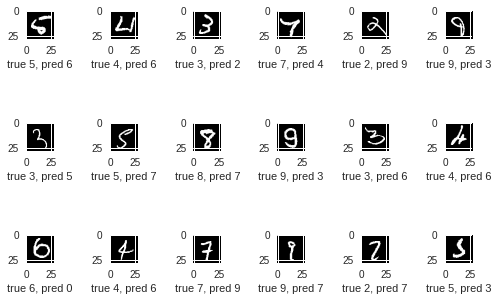

In [206]:
#training
with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(epochs):
    avg_cost = 0
    total_batches = int(mnist.train.num_examples/batch_size)
    for batch in range(total_batches):
      x, y =mnist.train.next_batch(batch_size)
      _, c = sess.run([optimizer,cost],feed_dict={X:x, Y:y})
      avg_cost += c / total_batches
    if (epoch+1)%100 == 0:
      print("epoch={} cost={}".format(epoch+1, avg_cost))
    
  corr_pred,acc,pred_cls = sess.run([correct_pred,accuracy,pred_cls],feed_dict={X:mnist.test.images, Y:mnist.test.labels})
  print("Accuracy={}",acc*100)
  
  print("Incorrect Predictions samples \n")
  incorrect_pred = [i for i in range(len(corr_pred)) if corr_pred[i] == False]
  incorrect_images = mnist.test.images[[incorrect_pred]]
  incorrect_images_pred_cls = pred_cls[[incorrect_pred]]
  incorrect_images_true_cls = mnist.test.labels[[incorrect_pred]] 
  
  plot_images(incorrect_images[0:18],incorrect_images_pred_cls[0:18],incorrect_images_true_cls[0:18])
  sess.close()
  